# Python-in-the-lab: errors, input/output and best tools II

In [41]:
import os
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## NumPy

[NumPy](www.numpy.org) is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

* [A tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)
* [The Numpy reference](https://docs.scipy.org/doc/numpy/reference/)
* [Numpy I/O](https://docs.scipy.org/doc/numpy/reference/routines.io.html)
* [Numpy Memmap: write on disk](https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html)
* [Numpy masked arrays](https://docs.scipy.org/doc/numpy/reference/routines.ma.html)

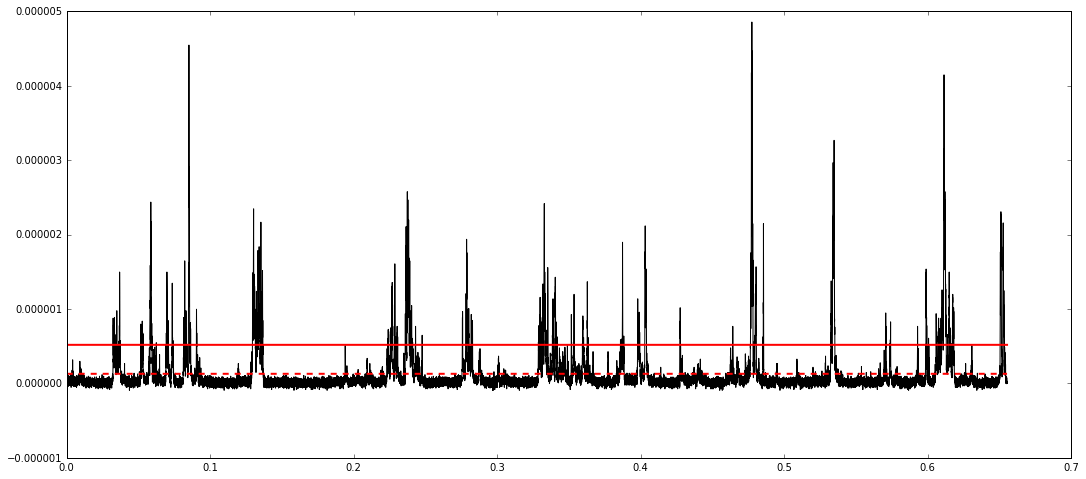

In [42]:
# Masked arrays
import numpy.ma as ma

# The file below contains a noise signal, made of a sequence of spikes (called Barkhausen jumps)
# The first line is the total time of the signal
# Note: the signal is negative, for simplicity use -signal
filename = "/home/gf/src/Python/Python-in-the-lab/Bk/F64ac_0.03_time_200.dat"
data = -np.loadtxt(filename)
with open(filename) as f:
    header = f.readline()
max_time = float(header[1:])
time = np.linspace(0, max_time, len(data))
fig = plt.figure(figsize=(18,8))
plt.plot(time, data, 'k')
data_mean = np.mean(data)
plt.plot(time, data_mean * np.ones_like(time), '--r', lw=2)

# ahah, what if we want to consider just the values above the average, and calculate the new mean?
# mask = data < data_mean
# data_masked = ma.masked_array(data, mask)
data_masked = ma.masked_less_equal(data, data_mean)
new_mean = data_masked.mean()
plt.plot(time, new_mean * np.ones_like(time), '-r', lw=2);

In [43]:
data_masked[160:230]

masked_array(data = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- 1.770092773437532e-07 -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- 2.770092773437532e-07 3.170092773437532e-07 1.370092773437531e-07
 1.470092773437531e-07 1.870092773437532e-07 -- -- -- -- -- -- -- -- -- --
 1.470092773437531e-07 1.670092773437531e-07 -- -- -- -- -- -- --],
             mask = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True],
       fill_value = 1e+20)

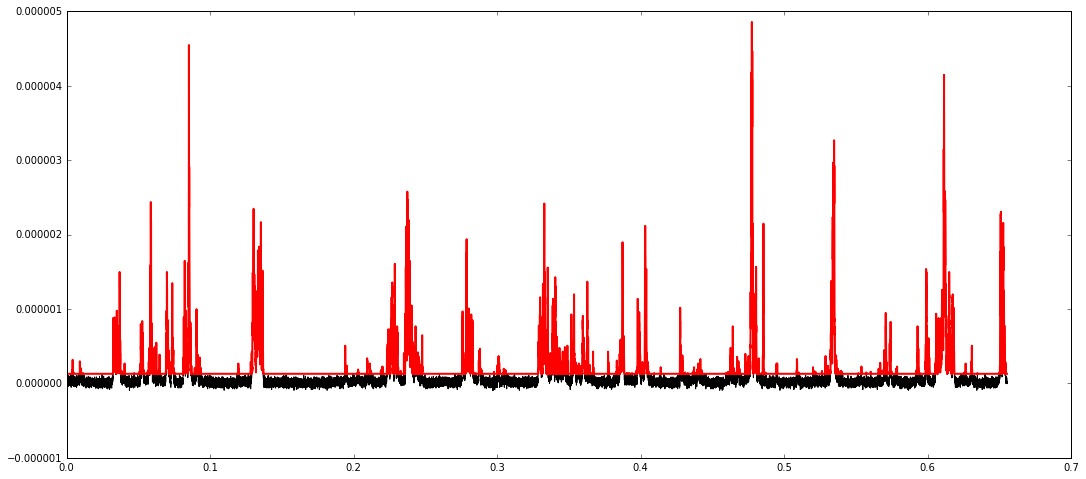

In [44]:
# It would be nice to plot the data above the original mean
# i.e. cut the data below it
fig = plt.figure(figsize=(18,8))
plt.plot(time, data, 'k')
plt.plot(time, data_masked.filled(data_mean), '-r', lw=2);

# Scipy

[Scipy](http://scipy.org/) SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, these are some of the core packages

* [The tutorial](https://docs.scipy.org/doc/scipy/reference/) Let's explore it, it is full of sub-packages
* [The scipy lectures](http://www.scipy-lectures.org/) Very nice!!!
* [Do you know Sympy?](http://www.sympy.org/en/index.html)

In [45]:
import sympy as sp
sp.init_printing()
from IPython.display import display

x = sp.symbols("x")
f = sp.sin(x)
display(f, sp.diff(f, x))
g = sp.diff(sp.sin(x)*sp.exp(-x), x)
display(g)
g_int = sp.integrate(g, x)
display(g_int)

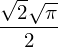

In [46]:
out = sp.integrate(sp.sin(x**2), (x, -sp.oo, sp.oo))
display(out)
# Not bad...

# Theano

[Theano](http://deeplearning.net/software/theano/) is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. 

In [47]:
import theano
from theano import tensor

# declare two symbolic floating-point scalars
a = tensor.dscalar()
b = tensor.dscalar()

# create a simple expression
c = a + b

# convert the expression into a callable object that takes (a,b)
# values as input and computes a value for c
f = theano.function([a,b], c)

# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
assert 4.0 == f(1.5, 2.5)

# Scikit-image

[scikit-image](http://scikit-image.org/) is a collection of algorithms for image processing. It is available free of charge and free of restriction. We pride ourselves on high-quality, peer-reviewed code, written by an active community of volunteers.

* [The User Guide](http://scikit-image.org/docs/stable/user_guide.html)

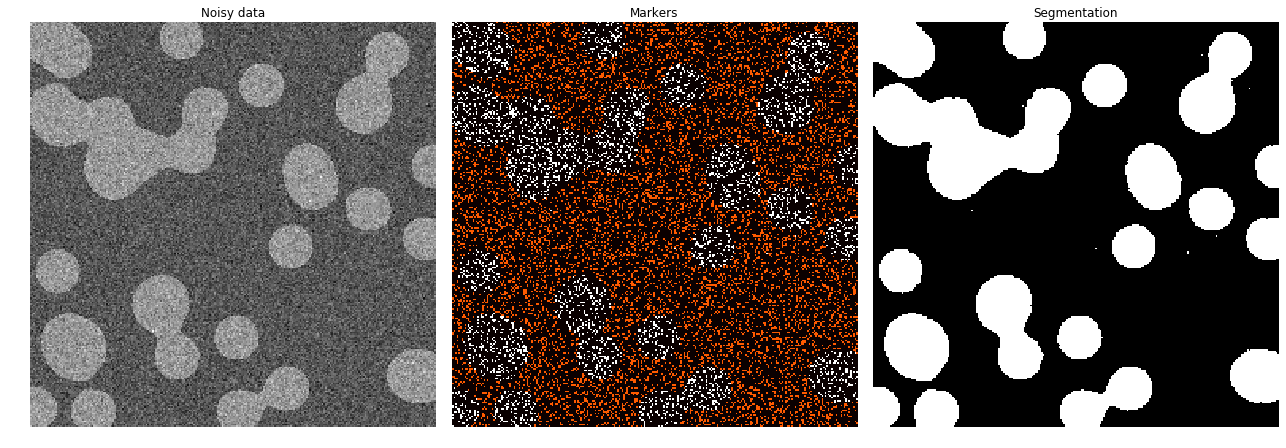

In [48]:
# From http://scikit-image.org/docs/stable/auto_examples/segmentation/plot_random_walker_segmentation.html
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
import skimage

# Generate noisy synthetic data
data = skimage.img_as_float(binary_blobs(length=256, blob_size_fraction=0.15, volume_fraction=0.3, seed=132))
data += 0.35 * np.random.randn(*data.shape)
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.3] = 1
markers[data > 1.3] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_adjustable('box-forced')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='hot', interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box-forced')
ax2.set_title('Markers')
ax3.imshow(labels, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_adjustable('box-forced')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()

## Special cases have to treated with care...
#### How to deal properly with a ome-tiff file
https://www.openmicroscopy.org/site/support/ome-model/ome-tiff/

In [49]:
import tifffile
from libtiff import TIFF # Unfortunately this works only in Python 2.X

class Images:
    def __init__(self, root_dir, pattern, resolution=np.int16):
        filename = os.path.join(root_dir, pattern)
        self.images = self._from_tif(filename, resolution)
        
    def _from_tif(self, filename, resolution):
        try:
            print("Loading %s" % filename)
            with tifffile.TiffFile(filename) as tif:
                frames = tif.micromanager_metadata['summary']['Frames']
                height = tif.micromanager_metadata['summary']['Height']
                width = tif.micromanager_metadata['summary']['Width']
                max_gray_level = tif.micromanager_metadata['display_settings'][0]['Max']
                bit_depth = tif.micromanager_metadata['summary']['BitDepth']
                images = tif.asarray()
            images = images.astype(self.resolution)
        except UnboundLocalError as e:
            print("The error is: %s" % e)
            print("Cannot load the %s file, try using libtiff (slower)" % filename)
            print("frames: %i, size: (%i,%i), bit depth: %i, max of gray level %i" % (frames, height, width, bit_depth, max_gray_level))
            tif = TIFF.open(filename, mode='r')
            images = np.empty((frames, height, width)).astype(resolution)
            for i,image in enumerate(tif.iter_images()):
                images[i] = image
            tif.close()
        return images

In [50]:
mainDir = "/home/gf/src/Python/Python-in-the-lab/images"
filename = "02_Irr_800uC_0.232A_MMStack_Pos0.ome.tif"

im = Images(mainDir, filename)

Loading /home/gf/src/Python/Python-in-the-lab/images/02_Irr_800uC_0.232A_MMStack_Pos0.ome.tif
The error is: local variable 'tif' referenced before assignment
Cannot load the /home/gf/src/Python/Python-in-the-lab/images/02_Irr_800uC_0.232A_MMStack_Pos0.ome.tif file, try using libtiff (slower)
frames: 250, size: (1040,1392), bit depth: 12, max of gray level 1338


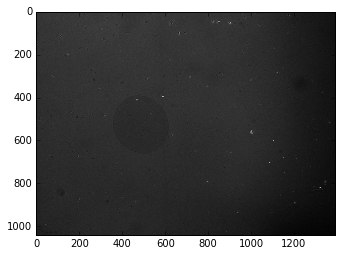

In [51]:
im0 = im.images[0]
plt.imshow(im0, 'gray')

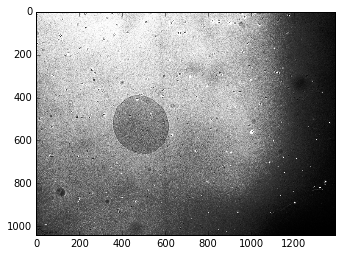

In [52]:
import skimage.exposure as expo
plt.imshow(expo.equalize_hist(im0), 'gray')

In [53]:
im.images.shape

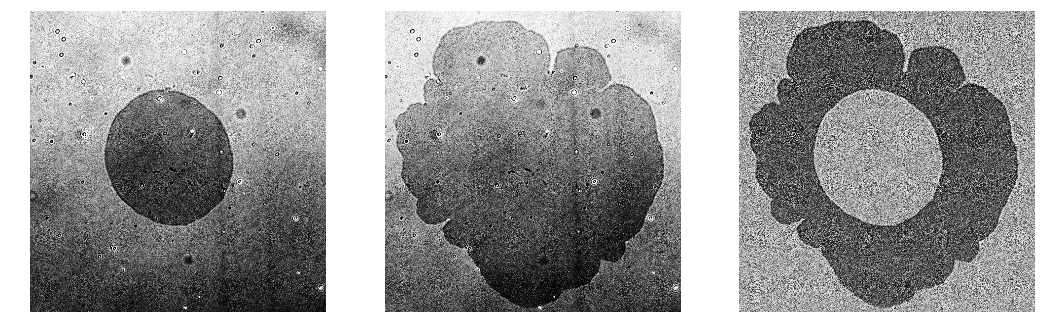

In [54]:
im100 = im.images[100]
fig,axs = plt.subplots(1, 3, figsize=(18,8))
for ax in axs: 
    ax.set_axis_off()
r0, r1, c0, c1 = 230, 840, 205, 805
axs[0].imshow(expo.equalize_hist(im0[r0:r1,c0:c1]), 'gray')
axs[1].imshow(expo.equalize_hist(im100[r0:r1,c0:c1]), 'gray')
axs[2].imshow(expo.equalize_hist(im100[r0:r1,c0:c1] - im0[r0:r1,c0:c1]), 'gray');

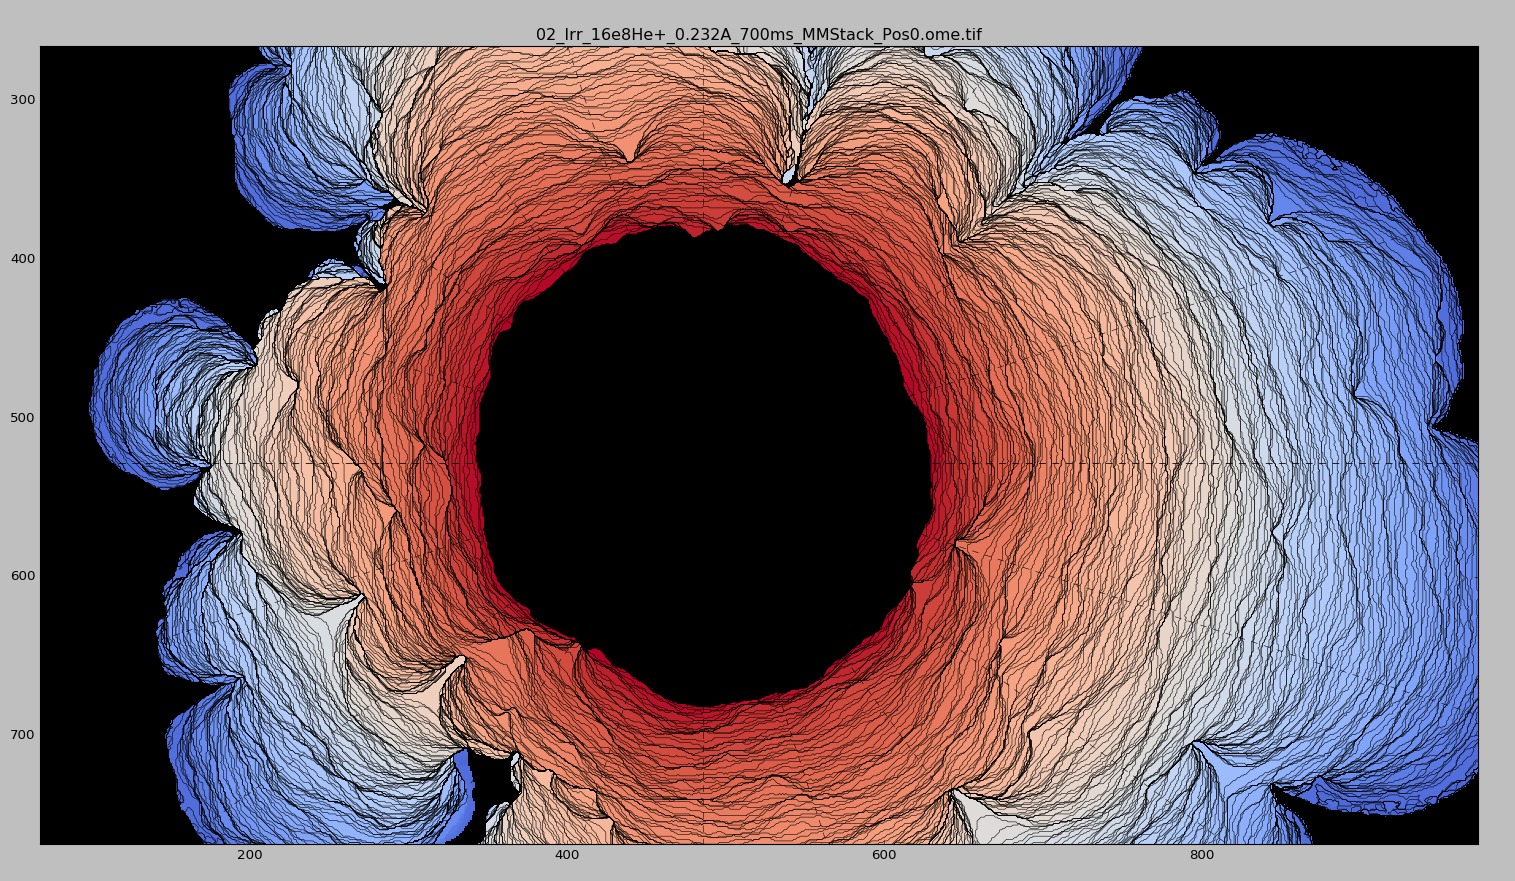

In [55]:
from IPython.display import Image
imageDir = "/home/gf/src/Python/Python-in-the-lab/images"
Image(filename=os.path.join(imageDir,"02_Irr_16e8He_0.232_700ms.jpg"))

## PyCuda

[PyCuda](https://mathema.tician.de/software/pycuda/) PyCUDA lets you access Nvidia‘s CUDA parallel computation API from Python


In [56]:
try:
    import pycuda.autoinit
    import pycuda.driver as drv
    from pycuda.compiler import SourceModule

    
    mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

    multiply_them = mod.get_function("multiply_them")

    a = numpy.random.randn(400).astype(numpy.float32)
    b = numpy.random.randn(400).astype(numpy.float32)

    dest = np.zeros_like(a)
    multiply_them(
        drv.Out(dest), drv.In(a), drv.In(b),
        block=(400,1,1), grid=(1,1))

    print dest-a*b
except:
    print("pyCuda not installed")

pyCuda not installed


## Pandas

[Pandas](http://pandas.pydata.org/)
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

* [Why Pandas](http://nbviewer.jupyter.org/github/jorisvandenbossche/pandas-tutorial/blob/master/01%20-%20Introduction.ipynb)
* [10 minutes with pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Getting data I/O](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out)
* [A general tutorial](https://github.com/jorisvandenbossche/pandas-tutorial)


## HDF5, h5py, and pytables

[h5py](http://docs.h5py.org/[h5py](en/latest/quick.html) The h5py package is a Pythonic interface to the HDF5 binary data format.

HDF5 lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

[PyTables](https://support.hdfgroup.org/HDF5/whatishdf5.html) 
PyTables is a package for managing hierarchical datasets and designed to efficiently and easily cope with extremely large amounts of data. 

PyTables is built on top of the HDF5 library, using the Python language and the NumPy package. It features an object-oriented interface that, combined with C extensions for the performance-critical parts of the code (generated using Cython), makes it a fast, yet extremely easy to use tool for interactively browse, process and search very large amounts of data

* [What is HDF5](https://support.hdfgroup.org/HDF5/whatishdf5.html)
* [Who uses HDF5](https://support.hdfgroup.org/HDF5/users5.html)

## Pickle

[Pickle](https://docs.python.org/2/library/pickle.html) The pickle module implements a fundamental, but powerful algorithm for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” [1] or “flattening”, however, to avoid confusion, the terms used here are “pickling” and “unpickling”.

In [57]:
import pickle

In [58]:
# Let's save the masked array we made at the beginning
print(data_masked.shape)
with open("masked_array.pkl", 'w') as f:
    pickle.dump(data_masked, f)

(32768,)


In [59]:
# Let's check it if we really wrote the file
import glob
glob.glob1(".", "masked*")

['masked_array.pkl']

In [60]:
# Try to unpickle
with open("masked_array.pkl", 'rb') as pickle_file:
    m_array = pickle.load(pickle_file)

In [61]:
m_array[450:480]

masked_array(data = [-- -- -- -- -- -- -- -- 2.070092773437532e-07 2.970092773437532e-07
 2.170092773437532e-07 1.970092773437532e-07 1.870092773437532e-07 -- -- --
 1.770092773437532e-07 -- -- -- -- -- -- -- -- -- -- -- --
 1.370092773437531e-07],
             mask = [ True  True  True  True  True  True  True  True False False False False
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False],
       fill_value = 1e+20)

In [62]:
data_masked[450:480]

masked_array(data = [-- -- -- -- -- -- -- -- 2.070092773437532e-07 2.970092773437532e-07
 2.170092773437532e-07 1.970092773437532e-07 1.870092773437532e-07 -- -- --
 1.770092773437532e-07 -- -- -- -- -- -- -- -- -- -- -- --
 1.370092773437531e-07],
             mask = [ True  True  True  True  True  True  True  True False False False False
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False],
       fill_value = 1e+20)